# Machine Learning in Time Series Forecasting	

# Overview of the Section

**1. Overview of the section**

**1 What we have done so far**

**2. Overview of Applied Machine Learning in Time Series Forecasting**

**3. Dataset Preparation**

**4. Univariate-time-series-forecasting**

    1. Autoregression (AR) in Time Series Forecasting
    2. Moving Average (MA) in Time Series Forecasting
    3. Autoregressive Moving Average (ARMA) in Time Series Forecasting
    4. Autoregressive integrated moving average (ARIMA) in Time Series Forecasting
    5. Auto ARIMA in Time Series Forecasting
    6. Seasonal Autoregressive Integrated Moving-Average (SARIMA) in Time Series Forecasting
    7. Auto - SARIMA in Time Series Forecasting    


# 1-Overview of this section


# What we have done So Far

# 2. Overview of Applied Machine Learning in Time Series Forecasting



**ML Methods For Time-Series Forecasting**


# 3. Preparaing Data to Apply Forecasting

# A- First things First
**Import Libraries**



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# B- Overview of the Dataset


In [2]:
df = pd.read_csv('datasets/air_pollution.csv', parse_dates=['date'])

In [3]:
df.columns

Index(['date', 'pollution_today', 'dew', 'temp', 'press', 'wnd_spd', 'snow',
       'rain', 'pollution_yesterday'],
      dtype='object')

In [4]:
df.drop(['dew', 'temp', 'temp',
       'press', 'wnd_spd','pollution_yesterday','snow','rain'], axis=1, inplace=True)

In [5]:
df.set_index('date', inplace=True)

In [6]:
df

,pollution_today
date,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667
...,...
2010-12-27,79.708333
2010-12-28,28.166667
2010-12-29,36.625000


# C- Compute the Difference

In [7]:
df['pollution_today'].shift(1)

date
2010-01-02           NaN
2010-01-03    145.958333
2010-01-04     78.833333
2010-01-05     31.333333
2010-01-06     42.458333
                 ...    
2010-12-27     50.625000
2010-12-28     79.708333
2010-12-29     28.166667
2010-12-30     36.625000
2010-12-31     17.583333
Name: pollution_today, Length: 364, dtype: float64

In [8]:
df['Pollution_today First Difference']= df['pollution_today']-df['pollution_today'].shift(1)

In [9]:
df['Pollution_today Seasonal First Difference']= df['pollution_today']-df['pollution_today'].shift(12)

In [10]:
df.head(14)

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference
date,,,
2010-01-02,145.958333,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN
2010-01-04,31.333333,-47.500000,NaN
2010-01-05,42.458333,11.125000,NaN
2010-01-06,56.416667,13.958333,NaN
2010-01-07,69.000000,12.583333,NaN
2010-01-08,176.208333,107.208333,NaN
2010-01-09,88.500000,-87.708333,NaN
2010-01-10,57.250000,-31.250000,NaN


# Revision of Stationary Check

In [11]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['pollution_today'])
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -9.511801
p value 0.000000
critical values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [12]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Pollution_today First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -8.996160
p value 0.000000
critical values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [13]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Pollution_today Seasonal First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -6.728681
p value 0.000000
critical values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


# D- Autocorrelation Check

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [15]:
import statsmodels.api as sm

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


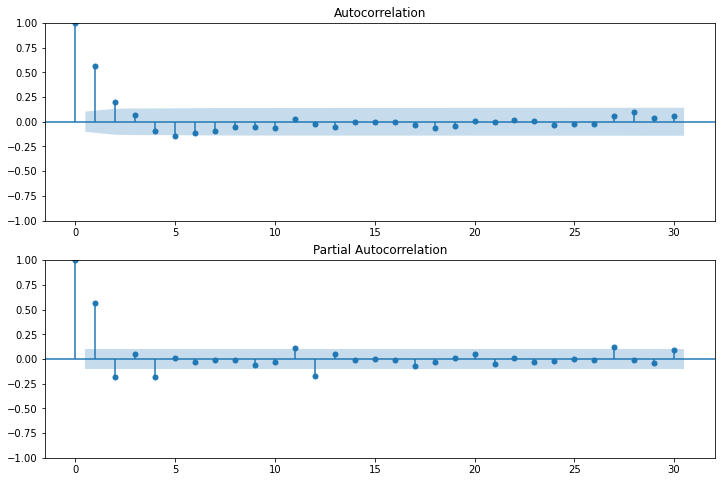

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['pollution_today'], lags=30, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['pollution_today'], lags=30, ax=ax2)

In [17]:
df['Pollution_today Seasonal First Difference']

date
2010-01-02           NaN
2010-01-03           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
                 ...    
2010-12-27     57.291667
2010-12-28    -26.041667
2010-12-29    -71.708333
2010-12-30   -254.166667
2010-12-31   -134.458333
Name: Pollution_today Seasonal First Difference, Length: 364, dtype: float64

In [18]:
df['Pollution_today Seasonal First Difference'].iloc[13:]

date
2010-01-15    -33.375000
2010-01-16    146.291667
2010-01-17    166.750000
2010-01-18    203.791667
2010-01-19    271.750000
                 ...    
2010-12-27     57.291667
2010-12-28    -26.041667
2010-12-29    -71.708333
2010-12-30   -254.166667
2010-12-31   -134.458333
Name: Pollution_today Seasonal First Difference, Length: 351, dtype: float64

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


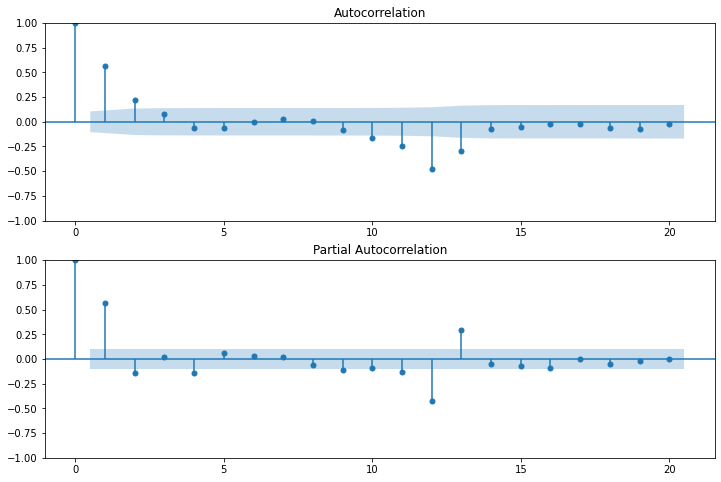

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Pollution_today Seasonal First Difference'].iloc[13:], lags=20, ax=ax2)

# E- Auto-Correlation and Partial Correlation



# Data Splitting

**Prepare data before modeling**

In [21]:
resultsDict = {}
predictionsDict={}

split_date = '2010-10-01'

df_training = df.loc[df.index<=split_date]
df_test = df.loc[df.index>split_date]

print(f"{len(df_training)} days of training data\n {len(df_test)} days of testing data ")

273 days of training data
 91 days of testing data 


# 4- Methods for time series forecasting



# A- Autoregression (AR)

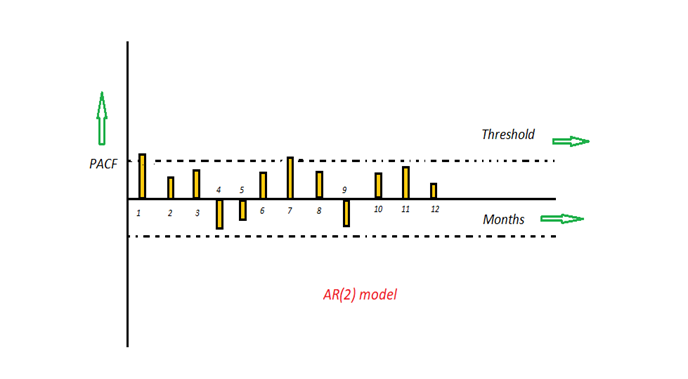

In [22]:
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from utils.metrics import evaluate

In [23]:
index = len(df_training)

y = list()


for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    
    model = AutoReg(temp_train.pollution_today, lags=50)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
    y = y +[predictions]
    
y = pd.concat(y)

resultsDict['AutoReg']= evaluate(df_test.pollution_today, y.values)
predictionsDict['AutoReg']= y.values

  0%|                                                                                           | 0/91 [00:00<?, ?it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_mode

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 48%|███████████████████████████████████████▏                                         | 44/91 [00:00<00:00, 101.45it/s]C:\Users\lenovo\a

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was 

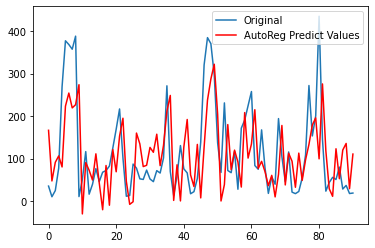

In [24]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(y.values, color='red', label='AutoReg Predict Values')
plt.legend()

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  363
Model:                    AutoReg(50)   Log Likelihood               -1696.708
Method:               Conditional MLE   S.D. of innovations             54.699
Date:                Sat, 27 Aug 2022   AIC                           3497.416
Time:                        13:07:20   BIC                           3692.218
Sample:                    02-21-2010   HQIC                          3575.264
                         - 12-30-2010                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  56.7857     25.982      2.186      0.029       5.862     107.710
pollution_today.L1      0.7480      0.056     13.293      0.000       0.638       0.858
pollution_today.L2     -0.3081      0.070     -4.379      0.000      -0.446      -0.170
pollution_today.L3      0.1625      0.072      2.242      0.025       0.020       0.305
pollution_today.L4     -0.1223      0.073     -1.673      0.094      -0.266       0.021
pollution_today.L5     -0.0665      0.073     -0.906      0.365      -0.211       0.077
pollution_today.L6      0.0173      0.073      0.238      0.812      -0.125       0.160
pollution_today.L7      0.0280      0.072      0.389      0.697      -0.113       0.169
pollution_today.L8     -0.0989      0.072     -1.374      0.170      -0.240       0.042
pollution_today.L9      0.0635      0.072      0.878      0.380      -0.078       0.205
pollution_today.L10    -0.1333      0.074     -1.792      0.073      -0.279       0.012
pollution_today.L11     0.1905      0.075      2.547      0.011       0.044       0.337
pollution_today.L12    -0.1528      0.075     -2.030      0.042      -0.300      -0.005
pollution_today.L13    -0.0088      0.076     -0.116      0.907      -0.158       0.140
pollution_today.L14     0.0302      0.076      0.397      0.691      -0.119       0.179
pollution_today.L15     0.0028      0.076      0.037      0.971      -0.145       0.151
pollution_today.L16     0.0255      0.076      0.338      0.735      -0.123       0.174
pollution_today.L17    -0.0966      0.075     -1.280      0.200      -0.245       0.051
pollution_today.L18     0.0016      0.075      0.021      0.983      -0.146       0.149
pollution_today.L19    -0.0410      0.075     -0.547      0.584      -0.188       0.106
pollution_today.L20     0.0740      0.075      0.987      0.324      -0.073       0.221
pollution_today.L21    -0.0738      0.075     -0.980      0.327      -0.221       0.074
pollution_today.L22     0.0343      0.076      0.450      0.653      -0.115       0.184
pollution_today.L23     0.0002      0.076      0.003      0.997      -0.149       0.150
pollution_today.L24    -0.0294      0.076     -0.388      0.698      -0.178       0.119
pollution_today.L25     0.0379      0.076      0.501      0.617      -0.111       0.186
pollution_today.L26    -0.1518      0.076     -2.006      0.045      -0.300      -0.003
pollution_today.L27     0.1806      0.076      2.371      0.018       0.031       0.330
pollution_today.L28     0.0317      0.077      0.413      0.679      -0.119       0.182
pollution_today.L29    -0.1040      0.077     -1.350      0.177      -0.255       0.047
pollution_today.L30     0.0648      0.078      0.834      0.405      -0.088       0.217
pollution_today.L31     0.0490      0.078      0.631      0.528      -0.103       0.201
pollution_today.L32    -0.0922      0.077     -1.200      0.230      -0.243       0.058
pollution_today.L33     0.1712      0.076      2.266      0.023       0.0

# B-Moving average

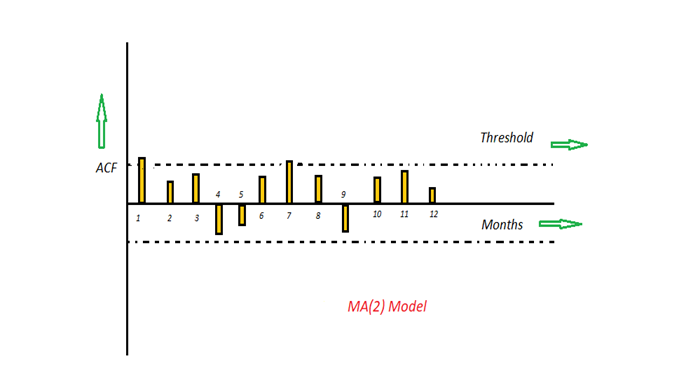

# C- ARMA





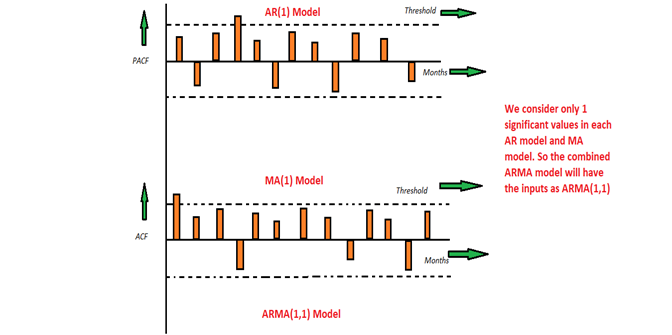




# D- Auto-Regressive Integrated Moving Average (ARIMA) Model



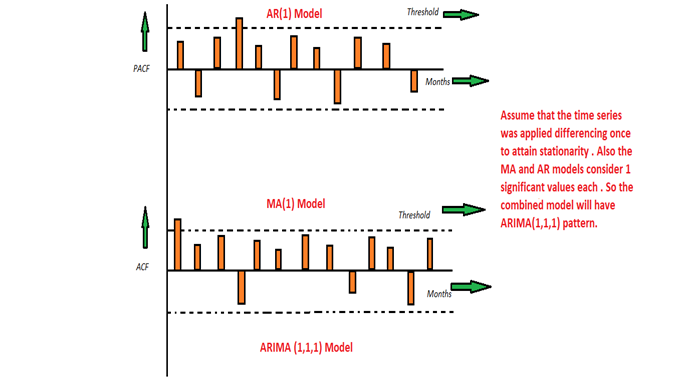


In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
model=ARIMA(df['pollution_today'], order=(1,1,1))
model_fit=model.fit()

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2012.200
Date:                Sat, 27 Aug 2022   AIC                           4030.399
Time:                        13:23:22   BIC                           4042.082
Sample:                    01-02-2010   HQIC                          4035.043
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5736      0.036     15.980      0.000       0.503       0.644
ma.L1         -0.9989      0.042    -23.997      0.000      -1.080      -0.917
sigma2      3774.2271    207.888     18.155      0.000    3366.774    4181.680
===================================================================================
Ljung-Box (L1) (Q):                   3.63   Jarque-Bera (JB):                67.97
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

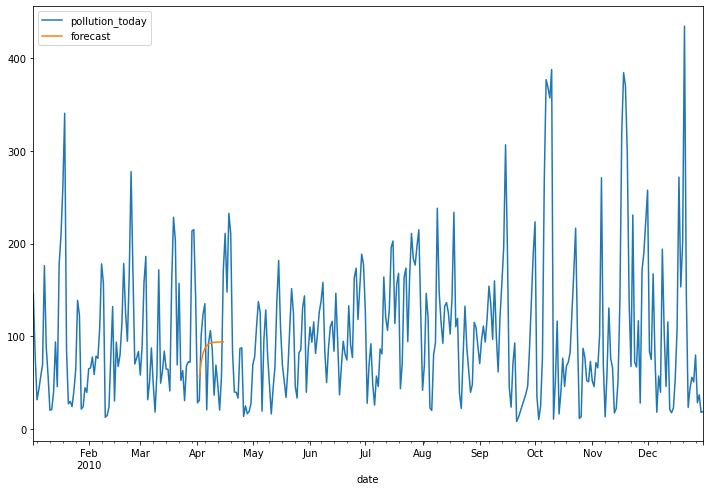

In [29]:
df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

df[['pollution_today','forecast']].plot(figsize=(12,8))

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

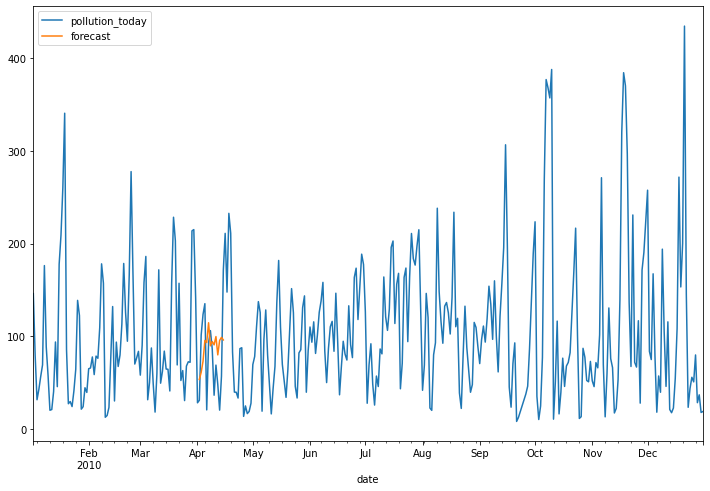

In [33]:
model=ARIMA(df['pollution_today'], order=(10,1,10))

model_fit=model.fit()
model_fit.summary()

df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)

df[['pollution_today','forecast']].plot(figsize=(12,8))

# E- Auto ARIMA

In [34]:
import pmdarima as pm

In [37]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3371.057, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2975.358, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3146.721, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2977.307, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2977.228, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2974.189, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2922.713, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3069.884, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3042.812, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2909.942, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2907.994, T

ARIMA(order=(0, 0, 2), scoring_args={}, suppress_warnings=True)

In [38]:
order = autoModel.order

yhat = list()


for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    
    model = ARIMA(temp_train.pollution_today, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end= len(temp_train), dynamic=False)
    
    yhat = yhat +[predictions]
    
yhat = pd.concat(yhat)

resultsDict['AutoARIMA{0}'. format(order)]= evaluate(df_test.pollution_today, yhat)
predictionsDict['AutoARIMA{0}'. format(order)]= yhat.values

  0%|                                                                                           | 0/91 [00:00<?, ?it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
  1%|▉                                                                                  | 1/91 [00:00<00:09,  9.71it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 14%|███████████▋                                                                      | 13/91 [00:01<00:07, 10.74it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 27%|██████████████████████▌                                                           | 25/91 [00:02<00:05, 12.47it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 41%|█████████████████████████████████▎                                                | 37/91 [00:03<00:04, 13.00it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 54%|████████████████████████████████████████████▏                                     | 49/91 [00:04<00:03, 12.14it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 67%|██████████████████████████████████████████████████████▉                           | 61/91 [00:05<00:02, 11.82it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [00:06<00:01, 11.15it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [00:07<00:00, 10.55it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\a

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        pollution_today   No. Observations:                  363
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2003.576
Date:                Sat, 27 Aug 2022   AIC                           4015.153
Time:                        13:36:22   BIC                           4030.730
Sample:                    01-02-2010   HQIC                          4021.345
                         - 12-30-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.9924      7.098     14.510      0.000      89.080     116.905
ma.L1          0.6842      0.041     16.612      0.000       0.603       0.765
ma.L2          0.1270      0.043      2.966      0.003       0.043       0.211
sigma2      3640.0401    227.420     16.006      0.000    3194.306    4085.775
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                64.51
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

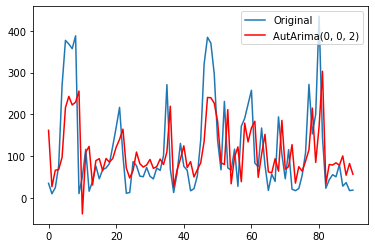

In [41]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoArima{0}'.format(order))
plt.legend()


# SARIMA and SARIMAX


# F- Seasonal Autoregressive Integrated Moving-Average (SARIMA)


In [42]:
import statsmodels.api as sm

In [46]:
model = sm.tsa.statespace.SARIMAX(df['pollution_today'], order=(10,1,10), seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                        pollution_today   No. Observations:                  364
Model:             SARIMAX(10, 1, 10)x(1, 1, [1], 12)   Log Likelihood               -1964.683
Date:                                Sat, 27 Aug 2022   AIC                           3975.367
Time:                                        13:49:43   BIC                           4064.165
Sample:                                    01-02-2010   HQIC                          4010.708
                                         - 12-31-2010                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2214      3.094     -0.072      0.943      -6.285       5.843
ar.L2          0.2091      1.854      0.113      0.910      -3.424       3.843
ar.L3          0.3825      1.804      0.212      0.832      -3.154       3.919
ar.L4          0.6679      2.163      0.309      0.757      -3.571       4.907
ar.L5          0.0886      1.706      0.052      0.959      -3.255       3.432
ar.L6         -0.8412      0.557     -1.509      0.131      -1.934       0.251
ar.L7         -0.0282      3.014     -0.009      0.993      -5.936       5.879
ar.L8         -0.1334      1.506     -0.089      0.929      -3.085       2.818
ar.L9          0.0743      0.891      0.083      0.934      -1.672       1.820
ar.L10         0.1219      0.730      0.167      0.867      -1.310       1.553
ma.L1         -0.0261      3.058     -0.009      0.993      -6.020       5.968
ma.L2         -0.6685      1.537     -0.435      0.664      -3.680       2.343
ma.L3         -0.5210      3.262     -0.160      0.873      -6.915       5.873
ma.L4         -0.6989      2.840     -0.246      0.806      -6.266       4.868
ma.L5          0.1334      1.506      0.089      0.929      -2.818       3.085
ma.L6          1.1432      1.096      1.043      0.297      -1.004       3.291
ma.L7          0.0040      3.893      0.001      0.999      -7.626       7.634
ma.L8         -0.0194      1.767     -0.011      0.991      -3.483       3.444
ma.L9         -0.0841      1.655     -0.051      0.959      -3.328       3.159
ma.L10        -0.2600      1.055     -0.246      0.805      -2.328       1.808
ar.S.L12      -0.1602      0.105     -1.521      0.128      -0.367       0.046
ma.S.L12      -0.8692      0.082    -10.665      0.000      -1.029      -0.709
sigma2      5120.7622   1700.795      3.011      0.003    1787.266    8454.259
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                25.55
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

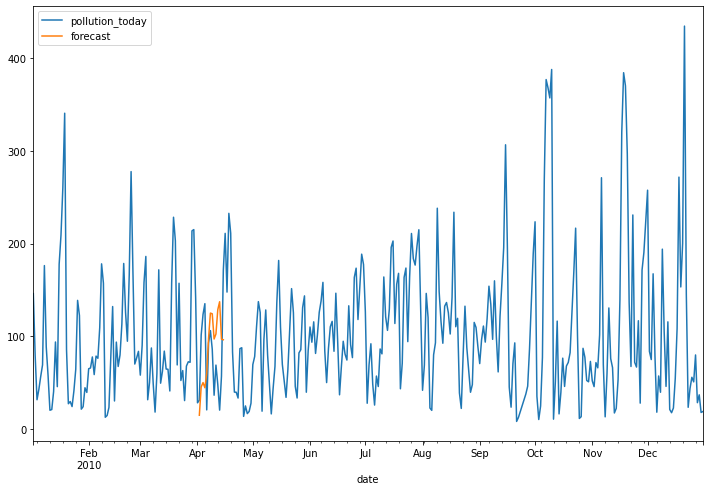

In [48]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

# FUTURE DF

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates= [df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [53]:
future_datest_df.tail(3)

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2012-09-30,NaN,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN,NaN
2012-11-30,NaN,NaN,NaN,NaN


In [54]:
future_df= pd.concat([df,future_datest_df])

In [55]:
future_df

,pollution_today,Pollution_today First Difference,Pollution_today Seasonal First Difference,forecast
2010-01-02,145.958333,NaN,NaN,NaN
2010-01-03,78.833333,-67.125000,NaN,NaN
2010-01-04,31.333333,-47.500000,NaN,NaN
2010-01-05,42.458333,11.125000,NaN,NaN
2010-01-06,56.416667,13.958333,NaN,NaN
...,...,...,...,...
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,NaN,NaN,NaN,NaN
2012-09-30,NaN,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN,NaN


<AxesSubplot:>

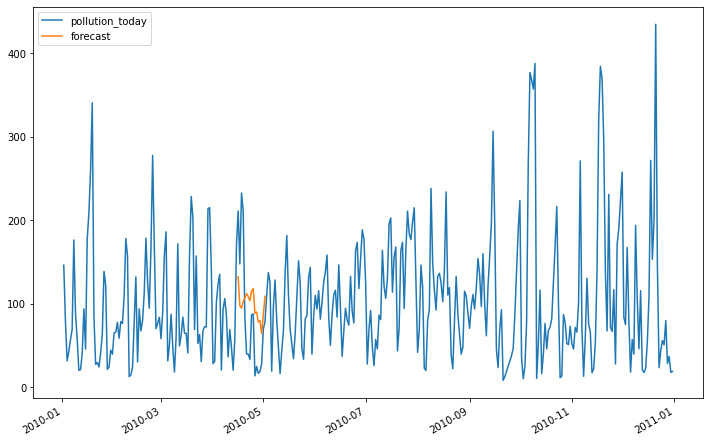

In [56]:
future_df['forecast']= results.predict(start=104, end=120, dynamic=True)

future_df[['pollution_today','forecast']].plot(figsize=(12,8))

# G -SARIMAX


# H- Auto SARIMA

In [57]:
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(df_training.pollution_today)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=2911.861, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=3015.307, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=2922.708, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=2913.573, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=3371.057, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=2910.814, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=2911.925, Time=0.12 sec
 ARIMA(2,0,2)(0,0,2)[6] intercept   : AIC=2910.085, Time=0.54 sec
 ARIMA(2,0,2)(1,0,2)[6] intercept   : AIC=2909.373, Time=1.20 sec
 ARIMA(2,0,2)(2,0,2)[6] intercept   : AIC=2914.013, Time=1.21 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=2908.915, Time=1.08 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=2909.298, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=2911.464, Time=0.28 sec
 ARIMA(1,0,2)(2,0,1)[6] intercept   : AIC=2911.319, Time=0.90 sec
 ARIMA(2,0,1)(2,0,1)[6] intercept

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(0, 0, 2, 6),
      suppress_warnings=True)

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
order = autoModel.order
seasonalOrder = autoModel.seasonal_order

yhat = list()

for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.pollution_today, order=order,
                    seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoSARIMAX {0},{1}'.format(order, seasonalOrder)] = evaluate(
    df_test.pollution_today, yhat.values)
predictionsDict['AutoSARIMAX {0},{1}'.format(
    order, seasonalOrder)] = yhat.values

  0%|                                                                                           | 0/91 [00:00<?, ?it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
  1%|▉                                                                                  | 1/91 [00:00<00:27,  3.23it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 16%|█████████████▌                                                                    | 15/91 [00:04<00:21,  3.54it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 18%|██████████████▍                                                                   | 16/91 [00:04<00:21,  3.44it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 33%|███████████████████████████                                                       | 30/91 [00:08<00:16,  3.81it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 34%|███████████████████████████▉                                                      | 31/91 [00:08<00:15,  3.81it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 49%|████████████████████████████████████████▌                                         | 45/91 [00:12<00:12,  3.59it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 51%|█████████████████████████████████████████▍                                        | 46/91 [00:12<00:12,  3.67it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 66%|██████████████████████████████████████████████████████                            | 60/91 [00:17<00:09,  3.32it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 67%|██████████████████████████████████████████████████████▉                           | 61/91 [00:17<00:09,  3.29it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [00:21<00:04,  3.54it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [00:21<00:04,  3.41it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No freq

 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [00:26<00:00,  2.95it/s]C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\envs\saad\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [00:26<00:00,  3.42it/s]


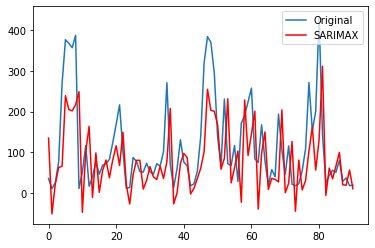

In [60]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()